# Modelling Classical, probabilistic, and Quantum Systems

## Classical Discrete Systems
![Deterministic System](images/ClassicPhysicalSystem.png)



Modeling the dynamic behaviors and the state of a classical discrete system using matrices and vectors. The state after one click is computed as follows:

$$
    \begin{bmatrix} 0 && 0 && 0 && 0 && 0 && 0 \\
                   0 && 0 && 0 && 0 && 0 && 0 \\
                   0 && 1 && 0 && 0 && 0 && 1 \\
                   0 && 0 && 0 && 1 && 0 && 0 \\
                   0 && 0 && 1 && 0 && 0 && 0 \\
                   1 && 0 && 0 && 0 && 1 && 0 \\
    \end{bmatrix}
    \begin{bmatrix} 6 \\
                    2 \\
                    1 \\
                    5 \\
                    3 \\
                    10 \\
    \end{bmatrix}
    =
    \begin{bmatrix} 0 \\
                    0 \\
                    12 \\
                    5 \\
                    1 \\
                    9 \\
    \end{bmatrix}$$

In [1]:
import numpy as np

# Define two 3x3 complex matrices
m1 = np.array([[0,0,0,0,0,0],
               [0,0,0,0,0,0],
               [0,1,0,0,0,1],
               [0,0,0,1,0,0],
               [0,0,1,0,0,0],
               [1,0,0,0,1,0]])

v1 = np.array([[6], [2], [1], [5], [3], [10]])


print("Input: ", m1,v1)

# Multiplying a 3x3 matrix by a 3x1 vector
state_after_one_click = np.dot(m1, v1)
print("Result after one Click: ", state_after_one_click)

Input:  [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 1 0]] [[ 6]
 [ 2]
 [ 1]
 [ 5]
 [ 3]
 [10]]
Result after one Click:  [[ 0]
 [ 0]
 [12]
 [ 5]
 [ 1]
 [ 9]]


![State after two clicks.](images/ClassicPhysicalSystem2.png)

The state after two cliks is computed as follows:

In [2]:
print("Result after two clicks: ", np.dot(m1,state_after_one_click))

Result after two clicks:  [[ 0]
 [ 0]
 [ 9]
 [ 5]
 [12]
 [ 1]]


## Exercises



### Excercise 1:

1. Write a program to model the behavior of the probabilistic double slit example depicted in the figure.
2. Show the results of the experiment using a bar diagram. Each bar represents the intensity of the light at the specific target.


![Probabilistic Double slit.](images/ProbabilisticSystem.png)

In [4]:
import numpy as np

def sistema_clasico_discreto(n_states=6):
    m = np.zeros((n_states, n_states), dtype=int)
    for i in range(n_states):
        m[(i+1) % n_states, i] = 1
    initial = np.zeros(n_states, dtype=int); initial[0] = 1
    s1 = m.dot(initial)
    s2 = np.linalg.matrix_power(m, 2).dot(initial)
    return m, initial, s1, s2

m, inicial, s1, s2 = sistema_clasico_discreto()
print(m)
print("inicial:", inicial)
print("1 click:", s1)
print("2 clicks:", s2)


[[0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]]
inicial: [1 0 0 0 0 0]
1 click: [0 1 0 0 0 0]
2 clicks: [0 0 1 0 0 0]


### Excercise 2:

1. Write a program to model the behavior of the quantum double slit example depicted in the figure.
2. Show the results of the experiment using a bar diagram. Each bar represents the intensity of the light at the specific target.


![Probabilistic Double slit.](images/QuantumSystem.png)

In [5]:
import numpy as np

P = np.array([[0.9, 0.1],
              [0.5, 0.5]])
pi0 = np.array([1.0, 0.0])
pi1 = pi0.dot(P)
pi2 = pi1.dot(P)
pi10 = pi0.dot(np.linalg.matrix_power(P, 10))
print("pi1 =", pi1)
print("pi2 =", pi2)
print("pi10 =", pi10)


pi1 = [0.9 0.1]
pi2 = [0.86 0.14]
pi10 = [0.83335081 0.16664919]


## Exercise 3: Simulating the Double Slit Experiment with Waves

### Objective

In this exercise, you will create a simulation of the double slit experiment using Python. Unlike particle-based interpretations, you will model light as waves and observe the interference pattern that emerges when waves pass through two slits and overlap on a screen. This simulation will help you visualize how constructive and destructive interference patterns form.

### Background

The double slit experiment demonstrates the wave-particle duality of light and
matter. When coherent light passes through two closely spaced slits, it creates
an interference pattern of bright and dark fringes on a detection screen. This
pattern results from the constructive and destructive interference of the waves
emanating from the slits.

### References

[Mathematics of Interference](https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/03%3A_Interference/3.03%3A_Mathematics_of_Interference)

### Task

Your task is to simulate the wave interference pattern using Python. Assume each slit acts as a point source of waves that spread out in circular patterns. When these waves overlap, they interfere with each other, creating a pattern of alternating high and low intensity on a screen.

### Steps

1. **Setup the Environment**: Ensure you have Python installed with the necessary libraries: NumPy for numerical calculations and Matplotlib for plotting.

2. **Define Parameters**:
   - Define the distance between the slits, the wavelength of the light, the distance from the slits to the screen, and the number of points on the screen where intensity will be calculated.

3. **Model the Waves**:
   - For simplicity, you can assume the wavefronts are straight lines perpendicular to the direction of propagation. Use the Huygens-Fresnel principle to model each slit as a source of new waves.

4. **Calculate Intensity**:
   - Use the principle of superposition to calculate the resultant wave amplitude at each point on the screen by summing the contributions from each slit.
   - The intensity of light at each point is proportional to the square of the amplitude of the resultant wave.

5. **Plot the Results**:
   - Plot the calculated intensity pattern on the screen. You should observe a series of bright and dark fringes, demonstrating the interference pattern.

### Hints

- Use NumPy arrays to efficiently calculate the wave amplitudes and intensities across the screen.
- Remember, the phase difference between the waves from the two slits contributes to the constructive (in-phase) and destructive (out-of-phase) interference.

### Sample Code Skeleton




In [6]:
import math
import numpy as np

H = (1/math.sqrt(2)) * np.array([[1,1],[1,-1]], dtype=complex)
ket0 = np.array([1.0, 0.0], dtype=complex)
psi = H.dot(ket0)
probs = np.abs(psi)**2
print("psi (amplitudes) =", psi)
print("probabilidades =", probs)


psi (amplitudes) = [0.70710678+0.j 0.70710678+0.j]
probabilidades = [0.5 0.5]


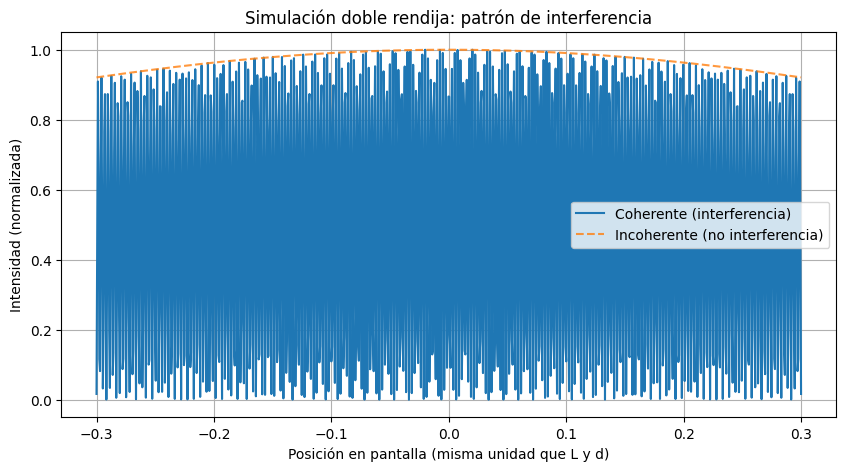

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Parámetros (ajusta según tu experimento)
slit_distance = 0.2     # separación entre rendijas (unidades arbitrarias, ej metros)
wavelength    = 0.0005  # longitud de onda (misma unidad; ej 0.5 mm -> ajustar según láser)
screen_distance = 1.0   # distancia rendijas -> pantalla (misma unidad)
screen_width   = 0.6    # ancho total de la región de la pantalla a muestrear
num_points     = 1000   # número de puntos en la pantalla para calcular intensidad

# Coordenadas de las rendijas (colocadas en y = +/- slit_distance/2, x = 0)
y1 = -slit_distance / 2.0
y2 =  slit_distance / 2.0

# Puntos en la pantalla (eje y) donde calculamos la intensidad
screen_points = np.linspace(-screen_width/2.0, screen_width/2.0, num_points)

# Constante de propagación
k = 2.0 * math.pi / wavelength

# Arrays para amplitudes
amp1 = np.zeros_like(screen_points, dtype=complex)
amp2 = np.zeros_like(screen_points, dtype=complex)

# Calcular amplitud de cada rendija en cada punto
for i, y in enumerate(screen_points):
    r1 = math.sqrt(screen_distance**2 + (y - y1)**2)
    r2 = math.sqrt(screen_distance**2 + (y - y2)**2)
    a1 = (1.0 / r1) * np.exp(1j * k * r1)
    a2 = (1.0 / r2) * np.exp(1j * k * r2)
    amp1[i] = a1
    amp2[i] = a2

# Interferencia coherente: sumar amplitudes y luego módulo al cuadrado
amp_total = amp1 + amp2
intensity = np.abs(amp_total)**2

# Intensidad incoherente (sin términos cruzados): suma de intensidades individuales
intensity_incoherent = np.abs(amp1)**2 + np.abs(amp2)**2

# Normalizar para facilitar comparación
intensity_norm = intensity / np.max(intensity)
intensity_incoh_norm = intensity_incoherent / np.max(intensity_incoherent)

# Gráfica
plt.figure(figsize=(10,5))
plt.plot(screen_points, intensity_norm, label="Coherente (interferencia)")
plt.plot(screen_points, intensity_incoh_norm, label="Incoherente (no interferencia)", linestyle='--', alpha=0.8)
plt.xlabel("Posición en pantalla (misma unidad que L y d)")
plt.ylabel("Intensidad (normalizada)")
plt.title("Simulación doble rendija: patrón de interferencia")
plt.legend()
plt.grid(True)
plt.show()
